<a href="https://colab.research.google.com/github/mahin632/exploratoray_data_analysis/blob/main/task2DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Load and Explore the Data
import pandas as pd

# Load the dataset
df = pd.read_csv('books_dataset.csv')

# Show top rows
print(df.head())

# Check structure
print(df.info())

# Summary stats for numerical data
print(df.describe())


                                   Title    Price Availability
0                   A Light in the Attic  Â£51.77     In stock
1                     Tipping the Velvet  Â£53.74     In stock
2                             Soumission  Â£50.10     In stock
3                          Sharp Objects  Â£47.82     In stock
4  Sapiens: A Brief History of Humankind  Â£54.23     In stock
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1000 non-null   object
 1   Price         1000 non-null   object
 2   Availability  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB
None
                         Title    Price Availability
count                     1000     1000         1000
unique                     999      903            1
top     The Star-Touched Queen  Â£44.18     In stock
freq                         2        3         1

In [13]:
#Clean the Data (if needed)
# Check for nulls
print(df.isnull().sum())

# Check for unique values in availability
print(df['Availability'].unique())

print("Duplicate rows:", df.duplicated().sum())



Title           0
Price           0
Availability    0
InStock         0
dtype: int64
['In stock']
Duplicate rows: 0


In [4]:
# Convert 'In stock' and 'Out of stock' to True/False
df['InStock'] = df['Availability'].apply(lambda x: 'in stock' in x.lower())


In [6]:
# Remove currency symbol and convert to float
df['Price'] = df['Price'].replace('[Â£]', '', regex=True).astype(float)

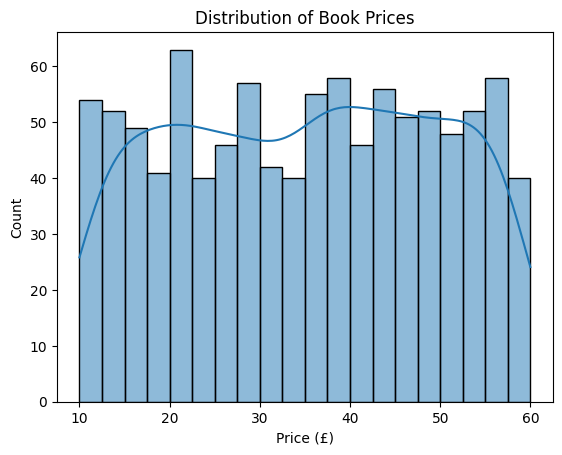

In [7]:
#Visualize the Data
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.show()

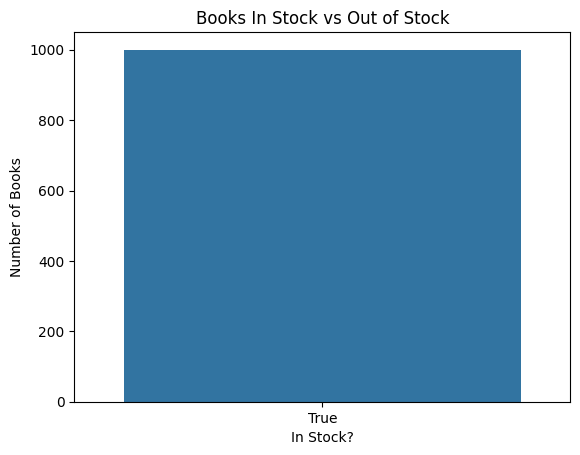

In [8]:
#Availability Count
sns.countplot(data=df, x='InStock')
plt.title('Books In Stock vs Out of Stock')
plt.xlabel('In Stock?')
plt.ylabel('Number of Books')
plt.show()


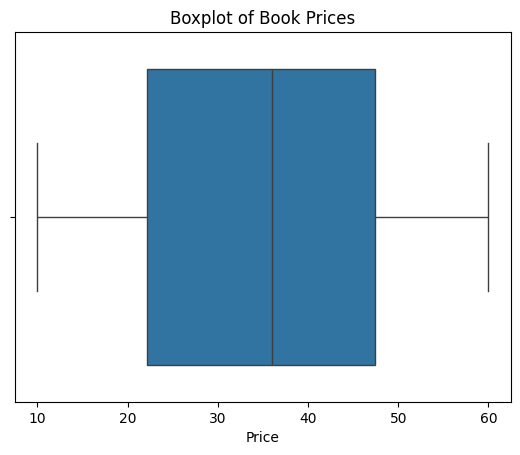

In [9]:
#Boxplot to Spot Outliers
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Book Prices')
plt.show()


In [17]:
from scipy.stats import zscore

# Calculate z-scores
df['z_score'] = zscore(df['Price'])

# Filter out extreme values
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
print("Outliers based on price Z-score:\n", outliers[['Title', 'Price', 'z_score']])


Outliers based on price Z-score:
 Empty DataFrame
Columns: [Title, Price, z_score]
Index: []


Average price: 35.07035
Title           The Perfect Play (Play by Play #1)
Price                                        59.99
Availability                              In stock
InStock                                       True
Name: 648, dtype: object
InStock
True    1000
Name: count, dtype: int64


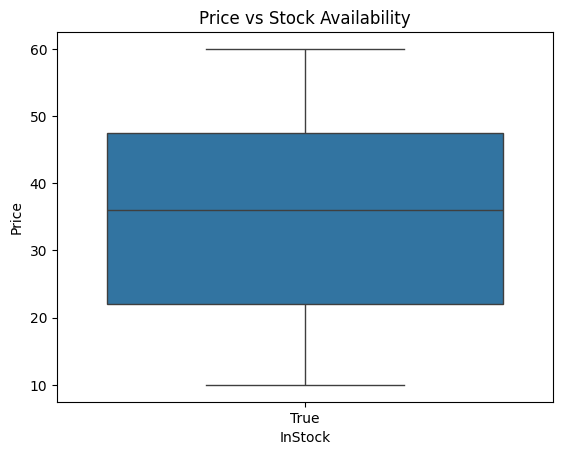

In [10]:
#Answer Questions / Find Patterns
print("Average price:", df['Price'].mean())
print(df.loc[df['Price'].idxmax()])
print(df['InStock'].value_counts())
sns.boxplot(data=df, x='InStock', y='Price')
plt.title('Price vs Stock Availability')
plt.show()


In [11]:
#Correlation (for numerical variables)
print(df.corr(numeric_only=True))


         Price  InStock
Price      1.0      NaN
InStock    NaN      NaN
